# Federal Research and Development Spending by Agency

This dataset provides a comprehensive overview of Federal Research and Development (R&D) spending by various agencies from 1976 to 2017. The data covers the allocation of federal funds to different agencies responsible for conducting research across various scientific, technological, and industrial sectors.

### Key Insights:

- **Annual Spending Trends**: The dataset allows for an analysis of how federal R&D spending has evolved over the years. This includes identifying years with significant increases or decreases in funding and examining broader economic or political trends that might influence these shifts.

- **Agency-Specific Funding**: By breaking down the spending by agency, the data reveals how different federal agencies have prioritized research and development within their respective domains, such as health, defense, energy, and space exploration. Some agencies, like the Department of Defense (DoD), typically receive larger portions of the budget, while others, like the National Institutes of Health (NIH), may focus on more specific sectors like health-related research.

- **Comparative Analysis**: The dataset allows for the comparison of R&D spending across agencies, highlighting which agencies consistently receive the highest levels of funding and which see fluctuations. This can be useful in understanding shifting federal priorities over time.

- **Impact of External Factors**: Trends in federal R&D funding can often correlate with broader national and global events such as policy changes, economic recessions, or technological breakthroughs. The dataset enables the exploration of these relationships.

This data is invaluable for policymakers, researchers, and analysts interested in understanding how public funds are allocated for research and development in the United States and how this impacts technological and scientific advancements.

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fed_rd = "/Users/korkemzharylkap/!Coding/fed_rd_year&gdp.csv"
df = pd.read_csv(fed_rd)

df.head()

,department,1976_gdp1790000000000.0,1977_gdp2028000000000.0,1978_gdp2278000000000.0,1979_gdp2570000000000.0,1980_gdp2797000000000.0,1981_gdp3138000000000.0,1982_gdp3314000000000.0,1983_gdp3541000000000.0,1984_gdp3953000000000.0,...,2008_gdp14752000000000.0,2009_gdp14415000000000.0,2010_gdp14799000000000.0,2011_gdp15379000000000.0,2012_gdp16027000000000.0,2013_gdp16516000000000.0,2014_gdp17244000000000.0,2015_gdp17983000000000.0,2016_gdp18470000000000.0,2017_gdp19177000000000.0
0,DHS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1155000000,1258000000,1009000000,848000000,527000000,737000000,1092000000,960000000,602000000,735000000
1,DOC,8.190000e+08,8.370000e+08,8.710000e+08,9.520000e+08,9.450000e+08,8.290000e+08,6.930000e+08,7.000000e+08,7.550000e+08,...,1379000000,1594000000,1521000000,1357000000,1373000000,1397000000,1641000000,1596000000,1730000000,1824000000
2,DOD,3.569600e+10,3.796700e+10,3.702200e+10,3.717400e+10,3.700500e+10,4.173700e+10,4.689300e+10,5.100800e+10,5.813900e+10,...,94247000000,93527000000,94325000000,88220000000,81543000000,70583000000,70341000000,69522000000,75213000000,51862000000
3,DOE,1.088200e+10,1.374100e+10,1.566300e+10,1.561200e+10,1.522600e+10,1.479800e+10,1.216000e+10,1.112900e+10,1.173100e+10,...,11343000000,11823000000,12329000000,11902000000,11839000000,11528000000,12686000000,15033000000,15504000000,15032000000
4,DOT,1.142000e+09,1.095000e+09,1.156000e+09,1.004000e+09,1.048000e+09,9.780000e+08,7.020000e+08,8.000000e+08,1.018000e+09,...,1016000000,1062000000,1221000000,1064000000,1007000000,881000000,843000000,926000000,910000000,936000000


### Data Cleaning & Tidy Process
The dataset was initially in a wide format, where multiple years were represented as column names. To make it tidy:

1. **Melting:** I reshaped the data so that each row represents a unique observation (department, year, budget).
2. **Splitting Year and GDP:** The "year_gdp" column was split to extract only the year values.
3. **Data Type Conversion:** We converted the year and budget columns to numeric format.
4. **Dropping Unnecessary Columns:** The redundant "year_gdp" column was removed to keep the dataset clean.

In [80]:
# Melt the dataframe to convert year-GDP columns into rows
df_melted = df.melt(id_vars=["department"], var_name="year_gdp", value_name="budget")

# Split the 'year_gdp' column to separate the year from GDP
df_melted[['year', 'gdp']] = df_melted['year_gdp'].str.split('_gdp', expand=True)

# Convert year and budget to numeric
df_melted['year'] = pd.to_numeric(df_melted['year'], errors='coerce')
df_melted['budget'] = pd.to_numeric(df_melted['budget'], errors='coerce')

# Drop the original 'year_gdp' column
df_melted = df_melted.drop(columns=['year_gdp'])

# Display the cleaned data
print(df_melted)

    department        budget  year               gdp
0          DHS           NaN  1976   1790000000000.0
1          DOC  8.190000e+08  1976   1790000000000.0
2          DOD  3.569600e+10  1976   1790000000000.0
3          DOE  1.088200e+10  1976   1790000000000.0
4          DOT  1.142000e+09  1976   1790000000000.0
..         ...           ...   ...               ...
583        NIH  3.305200e+10  2017  19177000000000.0
584        NSF  6.040000e+09  2017  19177000000000.0
585      Other  1.553000e+09  2017  19177000000000.0
586       USDA  2.625000e+09  2017  19177000000000.0
587         VA  1.367000e+09  2017  19177000000000.0

[588 rows x 4 columns]


### Pivot Table Analysis
To summarize the R&D budget data, I created a pivot tabls using the `pivot_table()` function in Pandas.

- The first pivot table calculates the **total R&D budget per department** to identify which departments receive the most funding.
- The second pivot table calculates the **average annual R&D budget per department** to analyze budget distribution over time.

These summaries help us identify trends and patterns in federal R&D spending.

### Visualization of Total and Departmental R&D Budgets Over Time

To analyze R&D budget trends over time, I created several visualizations that focus on both the **total federal R&D budget** and the **budget trends of top departments**.

- The **Total Federal R&D Budget Over Time Line Plot** shows the overall federal R&D budget over multiple years. The x-axis represents the years, while the y-axis shows the total budget in USD. The line plot provides a clear view of how the federal R&D budget has evolved over time, helping us identify any significant increases or decreases in funding.

- The **R&D Budget Trends of Top 5 Departments Over Time** is a line plot that highlights the budget trends for the **top 5 departments with the highest total R&D budgets**. The x-axis represents the years, and the y-axis shows the budget in USD. Each department is represented by a different color, allowing us to see how the budgets of these departments have changed over time. This visualization helps identify patterns in funding allocation and the relative growth or decline of top departments' budgets.

- The **Average R&D Budget Per Department Per Year Heatmap** visualizes the average R&D budget for each department across different years. The heatmap uses color intensity to represent the budget amount, with higher budgets shown in warmer colors. The values are scaled to millions of USD for easier readability. This visualization allows for a quick comparison of average R&D budgets across departments and highlights which departments consistently receive higher or lower funding.

All plots include gridlines for better readability, and titles and axis labels are added for context. The heatmap also includes annotations to show the exact budget values for each department and year. These visualizations provide a comprehensive view of how R&D budgets are allocated over time, both at the federal level and across individual departments.


In [81]:
# Create a pivot table showing the total R&D budget per department
pivot_table = df_melted.pivot_table(values="budget", index="department", aggfunc="sum")

# Display the pivot table
pivot_table

,budget
department,
DHS,1.591800e+10
DOC,5.172300e+10
DOD,2.716778e+12
DOE,4.991020e+11
DOT,3.854700e+10
EPA,3.151800e+10
HHS,9.364640e+11
Interior,3.782400e+10
NASA,5.098910e+11


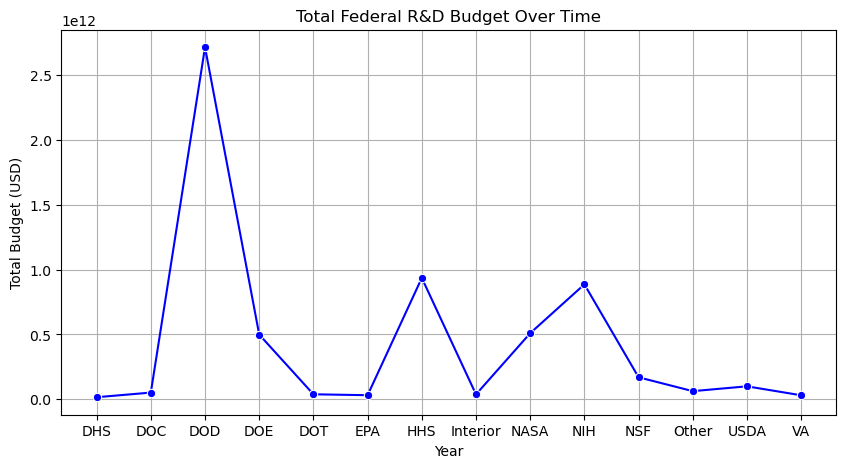

In [82]:
# Plot the total R&D budget over time
plt.figure(figsize=(10, 5))
sns.lineplot(data=pivot_table, x=pivot_table.index, y="budget", marker="o", color="b")
plt.title("Total Federal R&D Budget Over Time")
plt.xlabel("Year")
plt.ylabel("Total Budget (USD)")
plt.grid(True)
plt.show()

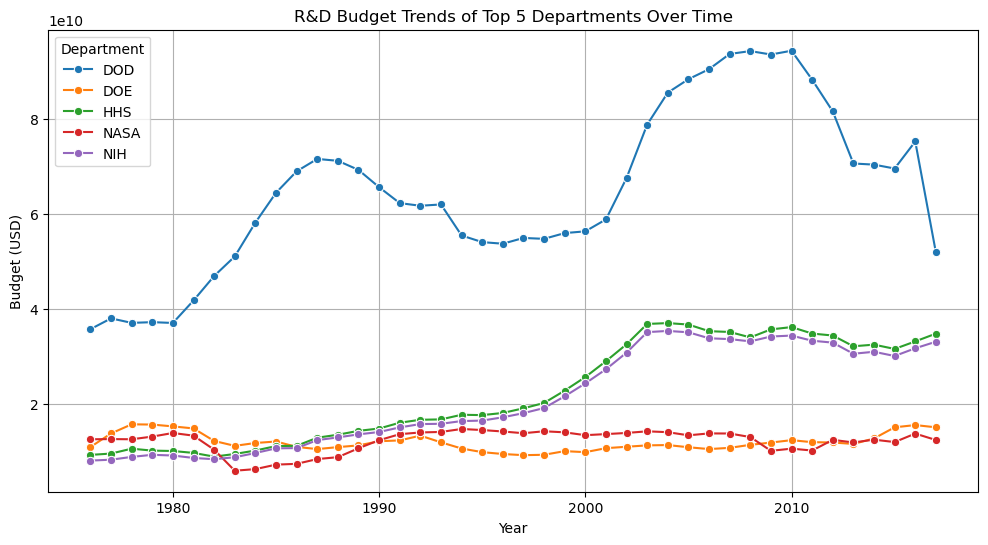

In [83]:
# Select top departments with the highest total budgets
top_departments = df_melted.groupby("department")["budget"].sum().nlargest(5).index

# Filter dataset for these departments
df_top_departments = df_melted[df_melted["department"].isin(top_departments)]

# Plot budget trends of top departments over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_top_departments, x="year", y="budget", hue="department", marker="o")
plt.title("R&D Budget Trends of Top 5 Departments Over Time")
plt.xlabel("Year")
plt.ylabel("Budget (USD)")
plt.legend(title="Department")
plt.grid(True)
plt.show()

In [84]:
# Pivot table for the average R&D budget per department per year
pivot_avg_table = df_melted.pivot_table(values="budget", index="department", columns="year", aggfunc="mean")

# Display the pivot table
pivot_avg_table

year,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
department,,,,,,,,,,,,,,,,,,,,,
DHS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.155000e+09,1.258000e+09,1.009000e+09,8.480000e+08,5.270000e+08,7.370000e+08,1.092000e+09,9.600000e+08,6.020000e+08,7.350000e+08
DOC,8.190000e+08,8.370000e+08,8.710000e+08,9.520000e+08,9.450000e+08,8.290000e+08,6.930000e+08,7.000000e+08,7.550000e+08,7.890000e+08,...,1.379000e+09,1.594000e+09,1.521000e+09,1.357000e+09,1.373000e+09,1.397000e+09,1.641000e+09,1.596000e+09,1.730000e+09,1.824000e+09
DOD,3.569600e+10,3.796700e+10,3.702200e+10,3.717400e+10,3.700500e+10,4.173700e+10,4.689300e+10,5.100800e+10,5.813900e+10,6.441600e+10,...,9.424700e+10,9.352700e+10,9.432500e+10,8.822000e+10,8.154300e+10,7.058300e+10,7.034100e+10,6.952200e+10,7.521300e+10,5.186200e+10
DOE,1.088200e+10,1.374100e+10,1.566300e+10,1.561200e+10,1.522600e+10,1.479800e+10,1.216000e+10,1.112900e+10,1.173100e+10,1.204300e+10,...,1.134300e+10,1.182300e+10,1.232900e+10,1.190200e+10,1.183900e+10,1.152800e+10,1.268600e+10,1.503300e+10,1.550400e+10,1.503200e+10
DOT,1.142000e+09,1.095000e+09,1.156000e+09,1.004000e+09,1.048000e+09,9.780000e+08,7.020000e+08,8.000000e+08,1.018000e+09,8.850000e+08,...,1.016000e+09,1.062000e+09,1.221000e+09,1.064000e+09,1.007000e+09,8.810000e+08,8.430000e+08,9.260000e+08,9.100000e+08,9.360000e+08
EPA,9.680000e+08,9.660000e+08,1.175000e+09,1.102000e+09,9.030000e+08,9.010000e+08,6.410000e+08,5.010000e+08,5.180000e+08,6.150000e+08,...,6.360000e+08,6.460000e+08,6.790000e+08,6.490000e+08,6.220000e+08,5.700000e+08,5.690000e+08,5.440000e+08,5.300000e+08,5.060000e+08
HHS,9.226000e+09,9.507000e+09,1.053300e+10,1.012700e+10,1.004500e+10,9.644000e+09,8.860000e+09,9.418000e+09,1.014500e+10,1.108300e+10,...,3.396400e+10,3.564900e+10,3.613400e+10,3.477300e+10,3.436000e+10,3.209500e+10,3.243800e+10,3.153700e+10,3.312100e+10,3.475800e+10
Interior,1.152000e+09,1.082000e+09,1.125000e+09,1.176000e+09,1.082000e+09,9.900000e+08,8.660000e+08,8.350000e+08,7.570000e+08,7.830000e+08,...,7.940000e+08,8.050000e+08,8.830000e+08,8.440000e+08,8.980000e+08,8.460000e+08,8.890000e+08,9.030000e+08,1.005000e+09,9.550000e+08
NASA,1.251300e+10,1.255300e+10,1.251600e+10,1.307900e+10,1.383700e+10,1.327600e+10,1.032200e+10,5.893000e+09,6.231000e+09,7.174000e+09,...,1.298500e+10,1.008700e+10,1.053800e+10,1.014700e+10,1.239100e+10,1.184500e+10,1.243200e+10,1.192700e+10,1.371300e+10,1.236100e+10


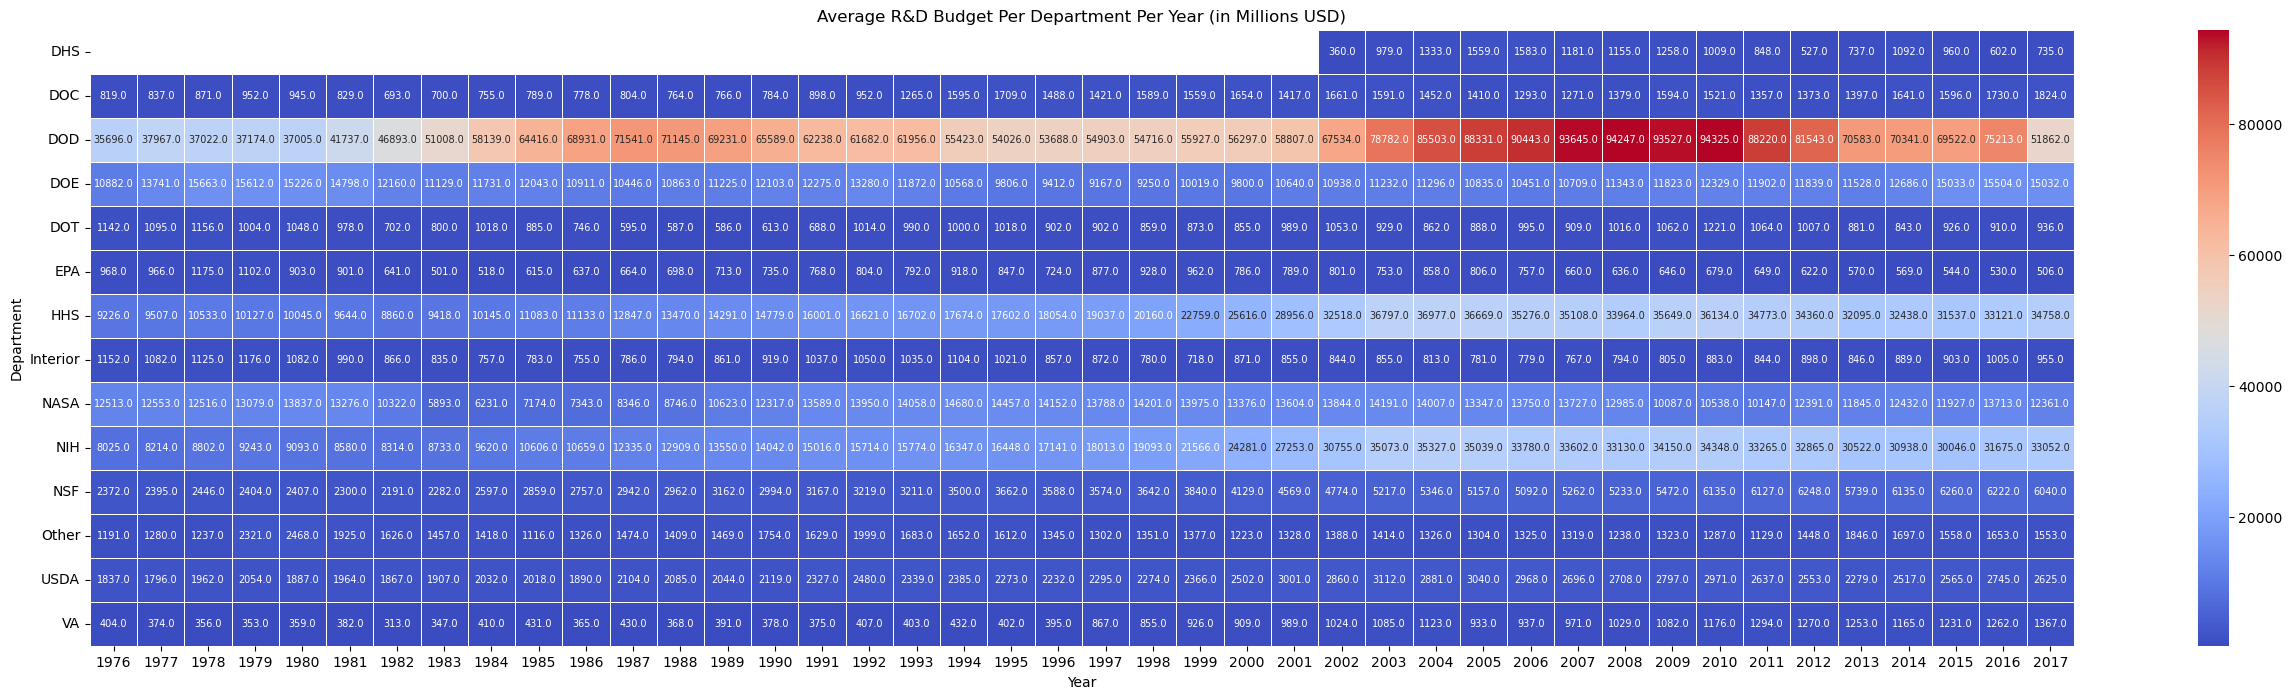

In [85]:

pivot_avg_table_in_millions = pivot_avg_table / 1e6 #To make numbers smaller
plt.figure(figsize=(32, 8))
sns.heatmap(
    pivot_avg_table_in_millions, 
    annot=True, 
    fmt=".1f",  # Show one decimal place
    cmap="coolwarm", 
    linewidths=0.5, 
    annot_kws={"size": 7}  # Reduce font size for better fit
)

plt.title("Average R&D Budget Per Department Per Year (in Millions USD)")
plt.xlabel("Year")
plt.ylabel("Department")
plt.show()

### Maximum and Minimum Budget Analysis

To summarize the R&D budget data, I created two separate dataframes by filtering and grouping the data to identify the departments with the **maximum** and **minimum** R&D budgets for each year.

- The first analysis identifies the **department with the maximum R&D budget per year**. This was done by grouping the data by `year` and using `idxmax()` to find the department with the highest budget each year. This helps us identify which department received the most funding each year and track how funding allocation changes over time.

- The second analysis identifies the **departments with the minimum R&D budget per year**. Similarly, this was done by grouping the data by `year` and using `idxmin()` to find the department with the lowest budget each year. This helps us highlight departments with limited funding, providing insights into areas that may need further attention or increased investment.

These summaries offer valuable insights into how R&D budgets are distributed across departments over time, revealing trends, disparities, and potential areas for further exploration.

### Visualization of Maximum and Minimum Budgets

To visualize the R&D budget trends, I created bar plots that highlight the **department with the maximum R&D budget** and the **department with the minimum R&D budget** for each year.

- The **Maximum Budget Bar Plot** shows the department that received the highest R&D budget for each year. The x-axis represents the years, while the y-axis shows the maximum budget for each year. This plot helps us track how funding allocation varies over time and identify which department received the most funding each year.

- The **Minimum Budget Bar Plot** similarly shows the departments with the lowest R&D budget for each year. By using a similar approach to the maximum budget plot, this visualization helps us understand the departments that received the least funding. Each bar is colored according to the department, making it easy to distinguish between them. It highlights areas where departments may be underfunded, providing insights into where additional investments might be needed.

Both visualizations are customized with titles, axis labels, and rotated x-axis labels for better readability. A grid is added to help visualize the data more clearly, and the legends show the corresponding department names for easy identification. These visualizations offer a clear and intuitive way to understand how the R&D budgets are distributed and how they change over time.

In [86]:
max_budget_per_year = df_melted.loc[df_melted.groupby("year")["budget"].idxmax()]

max_budget_per_year

,department,budget,year,gdp
2,DOD,3.569600e+10,1976,1790000000000.0
16,DOD,3.796700e+10,1977,2028000000000.0
30,DOD,3.702200e+10,1978,2278000000000.0
44,DOD,3.717400e+10,1979,2570000000000.0
58,DOD,3.700500e+10,1980,2797000000000.0
72,DOD,4.173700e+10,1981,3138000000000.0
86,DOD,4.689300e+10,1982,3314000000000.0
100,DOD,5.100800e+10,1983,3541000000000.0
114,DOD,5.813900e+10,1984,3953000000000.0
128,DOD,6.441600e+10,1985,4270000000000.0


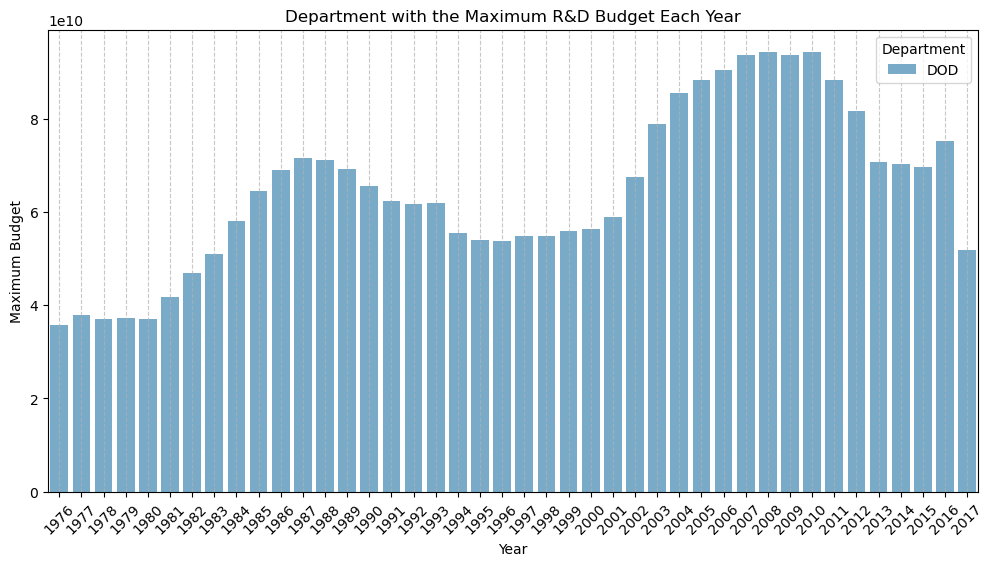

In [87]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x="year", 
    y="budget",  # Use budget as y-axis
    data=max_budget_per_year, 
    hue="department",  # Assign department to hue
    dodge=False,  # Ensures bars don't stack
    palette="Blues_r", 
    legend=True  # Keeps the legend with the department names
)

plt.title("Department with the Maximum R&D Budget Each Year")
plt.xlabel("Year")
plt.ylabel("Maximum Budget")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Adjust the legend to only display unique department names
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title="Department")

plt.show()


In [88]:
# Find the department with the minimum budget for each year
min_budget_per_year = df_melted.loc[df_melted.groupby("year")["budget"].idxmin()]

min_budget_per_year

,department,budget,year,gdp
13,VA,404000000.0,1976,1790000000000.0
27,VA,374000000.0,1977,2028000000000.0
41,VA,356000000.0,1978,2278000000000.0
55,VA,353000000.0,1979,2570000000000.0
69,VA,359000000.0,1980,2797000000000.0
83,VA,382000000.0,1981,3138000000000.0
97,VA,313000000.0,1982,3314000000000.0
111,VA,347000000.0,1983,3541000000000.0
125,VA,410000000.0,1984,3953000000000.0
139,VA,431000000.0,1985,4270000000000.0


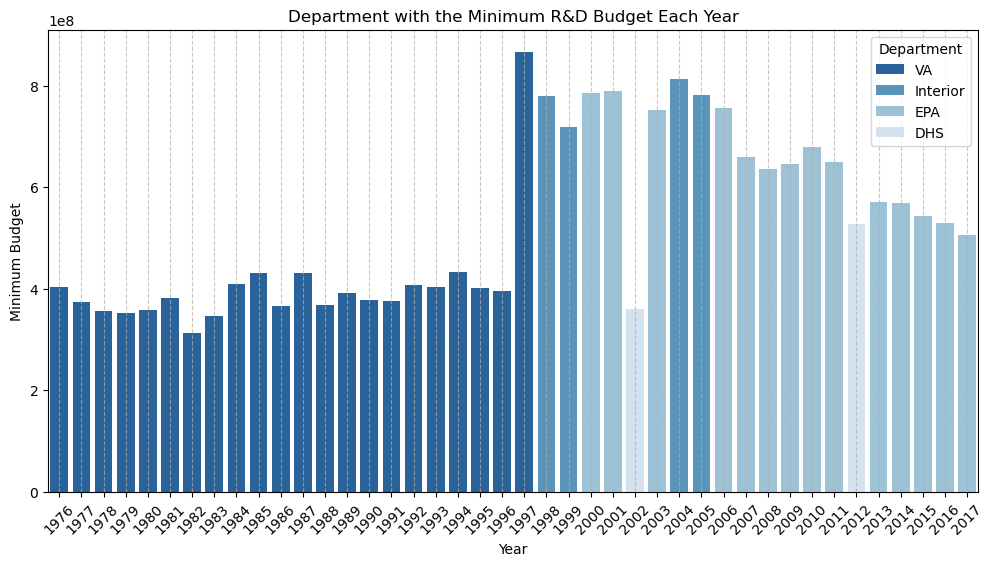

In [89]:
plt.figure(figsize=(12, 6))
plot = sns.barplot(
    x="year", 
    y="budget",  # Use budget as y-axis
    data=min_budget_per_year, 
    hue="department",  # Assign department to hue
    dodge=False,  # Ensures bars don't stack
    palette="Blues_r", 
    legend=True  # Keeps the legend with the department names
)

plt.title("Department with the Minimum R&D Budget Each Year")
plt.xlabel("Year")
plt.ylabel("Minimum Budget")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Adjust the legend to only display unique department names
handles, labels = plot.get_legend_handles_labels()
plot.legend(handles, labels, title="Department")

plt.show()
